# Experiments on the Route Optimizing Proplem
## Natrure Inspired Algorithms

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GA.Initializer import Heuristic_Initializer, Random_Initializer
from GA.Selector import Roulette_Selector
from GA.Recombiner import Recombiner
from GA.Mutator import Route_Mutator
from GA.Replacer import Replacer
from Task_Initializer import Task
from Evaluator import Evaluator
from Genetic_Alrorithm import Genetic_Alrorithm
from ACO_SORTER import ACO_Sorter
from ACO.ACO_Initializer import ACO_Initializer
from ACO.ACO_SolutionGenerator import SolutionGenerator
from ACO.ACO_Evaporator import Evaporator
from ACO.ACO_Intensificator import Intensificator

### Initialising the Modules and defining the parameters

In [19]:
initializer = Heuristic_Initializer()
initializer_name = 'heuristic'
#initializer = Random_Initializer()
#initializer_name = 'random'
selector = Roulette_Selector()
recombiner = Recombiner()
mutator = Route_Mutator()
replacer = Replacer()
problem = 1
task = Task('problem/{}'.format(problem))
evaluator = Evaluator()

pop_size = 100
offspring_size = 500
mutate_prop = 0.1
iterations = 10

aco_iterations = 5
aco_initializer = ACO_Initializer()
aco_solutiongenerator = SolutionGenerator()
aco_evaporator = Evaporator()
aco_intensificator = Intensificator()
sort_with_aco = False
aco_sorter = ACO_Sorter(aco_initializer,
                        aco_solutiongenerator,
                        aco_evaporator,
                        aco_intensificator,
                        task.distance_matrix,
                        aco_iterations)

In [20]:
ga = Genetic_Alrorithm(initializer=initializer,
                       selector=selector,
                       recombiner=recombiner,
                       mutator=mutator,
                       replacer=replacer,
                       evaluator=evaluator,
                       popSize=pop_size,
                       nrOffspring = offspring_size,
                       task=task,
                       mutate_prop=mutate_prop,
                       iterations=iterations,
                       aco_sorter = aco_sorter,
                       aco_sort_step=1,
                       sort_with_aco=sort_with_aco)

In [21]:
solutions = ga.run(logging=False)
df = pd.DataFrame.from_dict(solutions,orient='columns')

INFO:Genetic_Alrorithm:Intitialize population with size 100
INFO:Genetic_Alrorithm:Evaluate Population
INFO:Genetic_Alrorithm:Initial Fitness:			 Mean= 92325.5	Min=72438	Max=116468
INFO:Genetic_Alrorithm:Start genetic algorithm with 10 iterations
INFO:Genetic_Alrorithm:

Iteration 0
INFO:Genetic_Alrorithm:Offspring Fitness:		 Mean= 118312.91	Min=84751	Max=159333


AssertionError: 

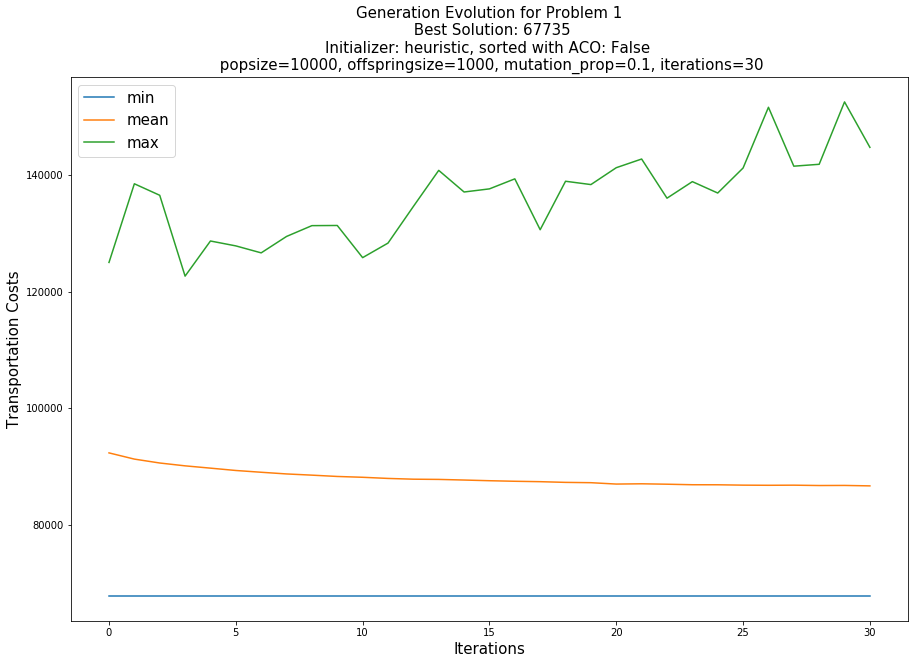

In [61]:
df.aggregate(['min','mean','max']).T.plot(figsize=(15,10))
plt.title('Generation Evolution for Problem {}\n Best Solution: {}\nInitializer: {}, sorted with ACO: {} \n popsize={}, offspringsize={}, mutation_prop={}, iterations={}'.format(problem,np.min(df.values),initializer_name,sort_with_aco,
                                                                                                                             pop_size,offspring_size,mutate_prop,iterations),
         fontsize=15)
plt.xlabel('Iterations',fontsize=15)
plt.ylabel('Transportation Costs',fontsize=15)
plt.legend(fontsize=15)
#plt.show()
plt.savefig('plots/init{}_pop{}_off{}_iter{}_aco{}_all'.format(initializer_name,pop_size,offspring_size,iterations,sort_with_aco))
plt.show()

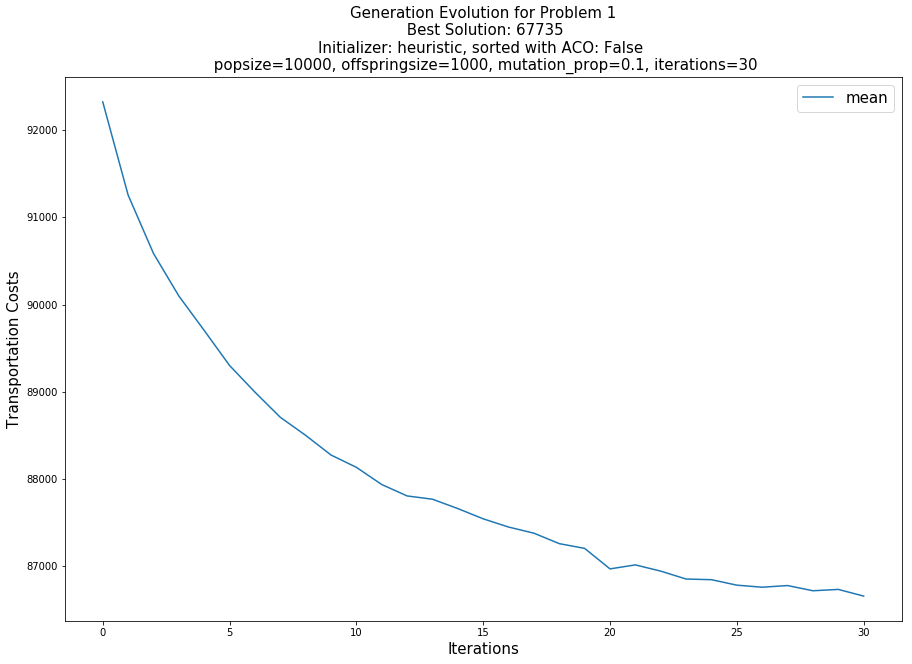

In [62]:
df.aggregate(['mean']).T.plot(figsize=(15,10))
plt.title('Generation Evolution for Problem {}\n Best Solution: {}\nInitializer: {}, sorted with ACO: {} \n popsize={}, offspringsize={}, mutation_prop={}, iterations={}'.format(problem,np.min(df.values),initializer_name,sort_with_aco,
                                                                                                                             pop_size,offspring_size,mutate_prop,iterations),
         fontsize=15)
plt.xlabel('Iterations',fontsize=15)
plt.ylabel('Transportation Costs',fontsize=15)
plt.legend(fontsize=15)
#plt.show()
plt.savefig('plots/prob{}_init{}_pop{}_off{}_iter{}_aco{}_mean'.format(problem,initializer_name,pop_size,offspring_size,iterations,sort_with_aco))
plt.show()

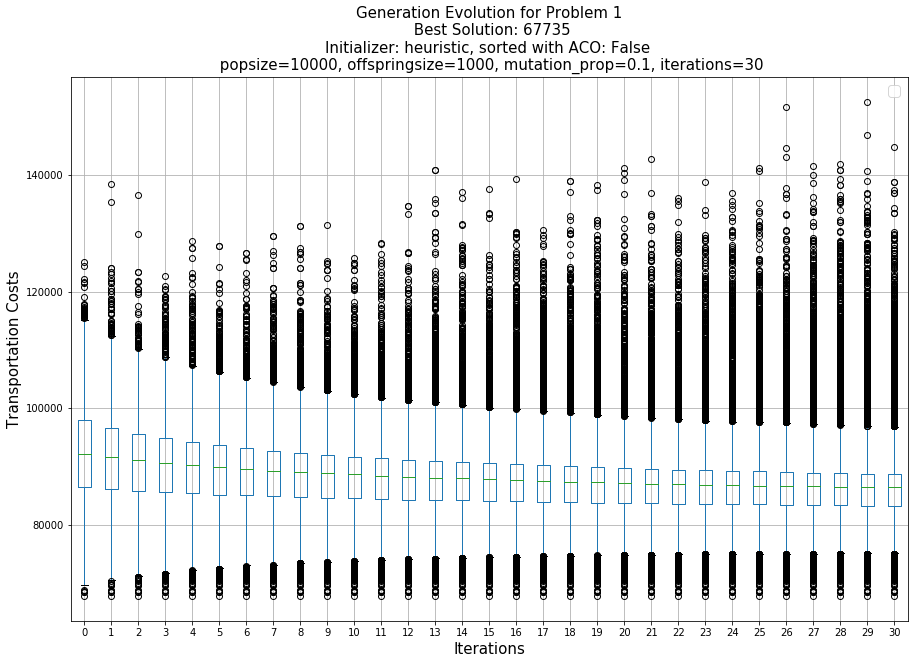

In [63]:
df.boxplot(figsize=(15,10))
plt.title('Generation Evolution for Problem {}\n Best Solution: {}\nInitializer: {}, sorted with ACO: {} \n popsize={}, offspringsize={}, mutation_prop={}, iterations={}'.format(problem,np.min(df.values),initializer_name,sort_with_aco,
                                                                                                                             pop_size,offspring_size,mutate_prop,iterations),
         fontsize=15)
plt.xlabel('Iterations',fontsize=15)
plt.ylabel('Transportation Costs',fontsize=15)
plt.legend(fontsize=15)
#plt.show()
plt.savefig('plots/prob{}_init{}_pop{}_off{}_iter{}_aco{}_boxplots'.format(problem,initializer_name,pop_size,offspring_size,iterations,sort_with_aco))
plt.show()